<a href="https://colab.research.google.com/github/Laura-Burgmane/Python/blob/main/P_17%2624_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd


In [17]:
advertising = pd.read_csv("/tvmarketing.csv")
#TV = advert budget spent on TV marketing
#Sales = sales amount (income, revenue) of the product

In [18]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [19]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [20]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

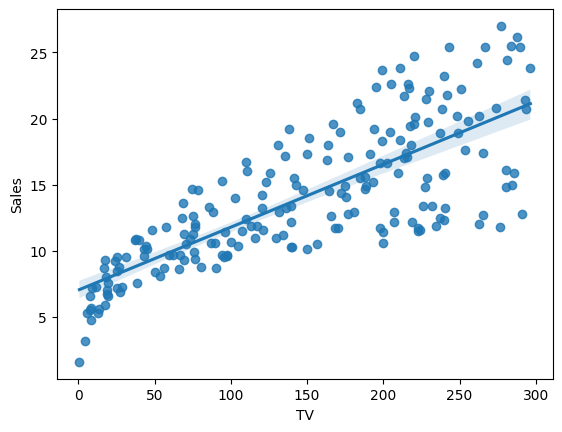

In [21]:
sns.regplot(x = 'TV', y = 'Sales', data = advertising)


In [22]:
#Pearson correlation coeficient
advertising.corr()#calculate correlation for the whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [23]:
advertising['TV'].corr(advertising['Sales'])#positive strong correlation, the more spent on adv, the more sold

0.7822244248616061

In [24]:
# Supervised vs. un-supervised learning
#nicer way of inserting picture:
#![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

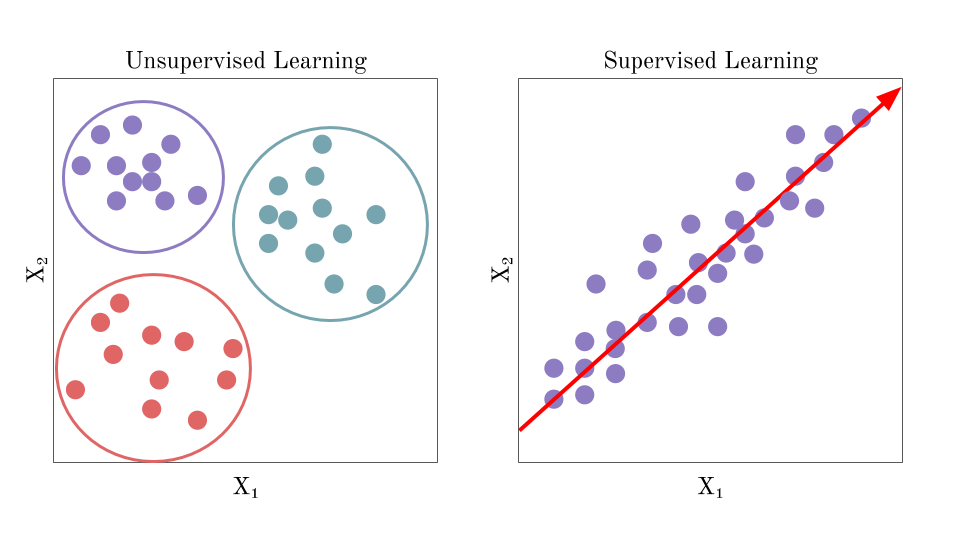

In [25]:
#STICKIT LEARN LIBRARY, linear regression


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [26]:
#data preparation for model building: x and y axis
# for linear model data must be arrays
x = advertising.drop('Sales', axis=1)#axis=1 means referring to columns not rows
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [27]:
y = advertising.drop('TV', axis=1)
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [28]:
# Train/Test Sets


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size = 0.7, random_state=42)
x_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [31]:
# column aka FEATURE
# row aka OBSERVATION

In [32]:
# TRAIN THE MODEL
from sklearn.linear_model import LinearRegression #importing the model


In [33]:
model = LinearRegression()#initialize the model


In [34]:
model.fit(x_train, y_train)# fitting the model

LinearRegression()

In [35]:
### y = mX + b ###   WTF IS THIS?????
print(f"Model intercept is: {model.intercept_}")
print(f"Model coefficient is: {model.coef_}")

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


In [36]:
my_new_budget = [[50]] #2D array dataset
my_predicted_sales = model.predict(my_new_budget)
#my_predicted_sales = round(my_predicted_sales[0][0],2)
my_predicted_sales # predicted amount is 14...???
print(f'When the new budget is {my_new_budget[0][0]}, then the predicted sales are {my_predicted_sales[0][0]}')

When the new budget is 50, then the predicted sales are 9.559849937158777


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
y_pred = model.predict(x_test)# predicting the sales on each marketing...###MADNESS...


In [38]:
final_df = pd.DataFrame()
final_df['TV'] = x_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901


In [39]:
final_df.reset_index(drop=True, inplace=True)

In [40]:
final_df.head(5)

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
0,163.3,16.9,14.817854,2.082146
1,195.4,22.4,16.307544,6.092456
2,292.9,21.4,20.832305,0.567695
3,11.7,7.3,7.782431,0.482431
4,220.3,24.7,17.463099,7.236901


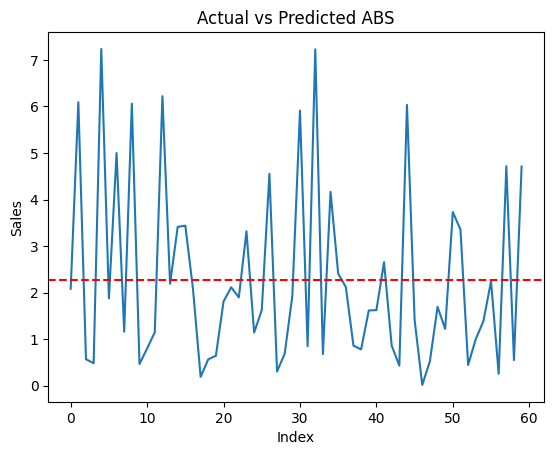

In [43]:
import matplotlib.pyplot as plt
plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted)
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted ABS')
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), linestyle = 'dashed', color='red')

In [45]:
# mean absolute error MAE
from sklearn.metrics import mean_absolute_error

In [50]:
mae = mean_absolute_error(y_test, y_pred)

In [51]:
print(f'Mean ABS error is : {mae}') # average distance between real and redicted data

Mean ABS error is : 2.2758809050205113


In [52]:
# R2 and MSE
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE is: {mse}')
print(f'r2 is : {r2}')

MSE is: 8.970991242413614
r2 is : 0.6714477229302764
